## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import expon
from scipy.stats import binom

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[11, 20, 91],
       [29, 40, 77],
       [ 2, 55, 89],
       [30, 41, 53],
       [35, 48, 58],
       [37, 49, 79]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([11, 20, 91]), array([29, 40, 77]))

The lowest card in the game is

In [6]:
np.min(cards)

10

In [7]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

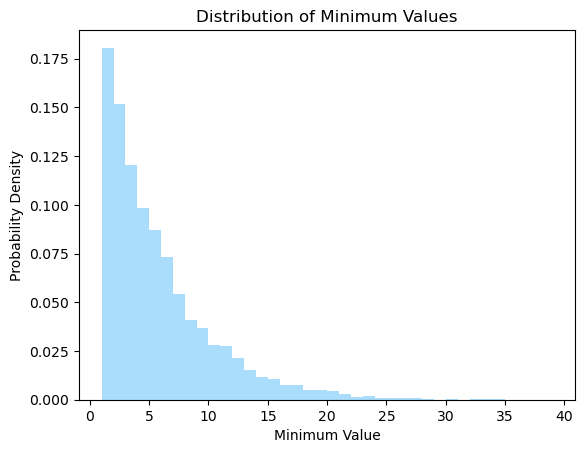

In [4]:
# Set the number of times to repeat the sampling
num_samples_q1 = 10000
# Collect the lowested number
min_values_q1 = []
for i in range(num_samples_q1):
    cards = sample_cards(100, 6, 3)
    min_values_q1.append(np.min(cards))

# Plot the distribution of the lowest number
plt.hist(min_values_q1, bins=np.arange(1,40), density=True, alpha=0.7, color='lightskyblue')
plt.xlabel('Minimum Value')
plt.ylabel('Probability Density')
plt.title('Distribution of Minimum Values')
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

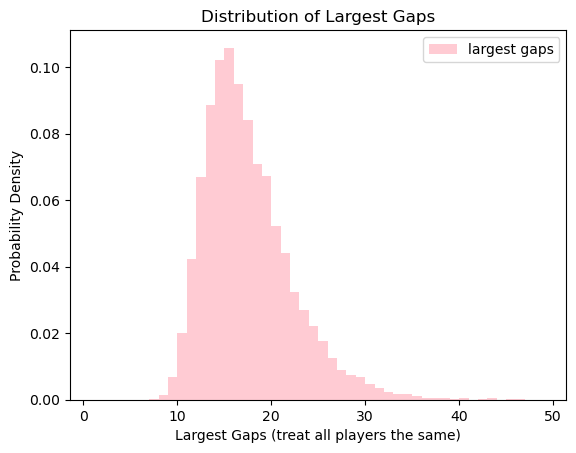

In [5]:
# Set the number of simulations
num_simulations_q2 = 10000
N_q2 = 100
n_q2 = 6
k_q2 = 3

# Collect the largest gap when all the cards among players
largest_gaps_q2 = []
for i in range(num_simulations_q2):
    cards_q2 = sample_cards(N_q2, n_q2, k_q2)
    # combine cards from all players to one pool
    all_cards_q2 = []
    for sublist in cards_q2:
        all_cards_q2.extend(sublist)
    sorted_cards_q2 = np.sort(all_cards_q2)
    gaps_q2 = np.diff(sorted_cards_q2)
    largest_gaps_q2.append(np.max(gaps_q2))
    
plt.hist(largest_gaps_q2, bins=np.arange(1,50), density=True, alpha=0.7, color='lightpink',label = 'largest gaps')
plt.xlabel('Largest Gaps (treat all players the same)')
plt.ylabel('Probability Density')
plt.title('Distribution of Largest Gaps')
plt.legend()
plt.show()

Repeat the experiment but now compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

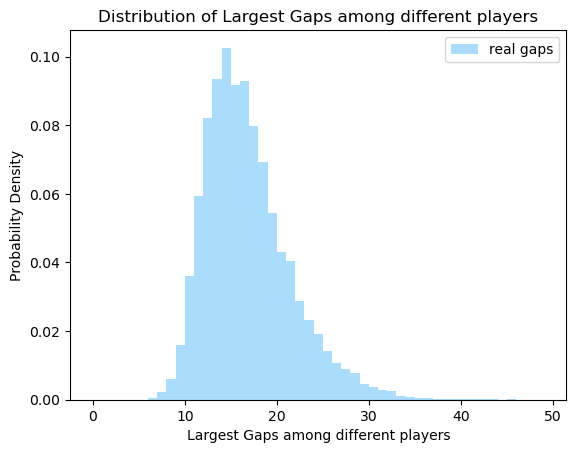

In [7]:
num_simulations = 10000
k = 3
n = 6
N = 100

# calculate the gap when consider differnet players
largest_gaps_real = []
for i in range(num_simulations):
    cards = sample_cards(N, n, k)
    player_ids = np.tile(np.arange(1,n+1),(k,1)).T # get the ID and make ID a matrix based on how many cards each player has
    flat_cards,flat_ids = cards.flatten(),player_ids.flatten()
    order_ids = np.argsort(flat_cards) # assort and only return index
    gap_ids = np.diff(flat_ids[order_ids])
    gap_cards = np.diff(flat_cards[order_ids])
    gap_unique = gap_cards * (gap_ids != 0) # only take difference when "True"
    largest_gaps_real.append(np.max(gap_unique))

plt.hist(largest_gaps_real, bins=np.arange(0,50), density=True, alpha=0.7, color='lightskyblue',label = 'real gaps')
plt.xlabel('Largest Gaps among different players')
plt.ylabel('Probability Density')
plt.title('Distribution of Largest Gaps among different players')
plt.legend()
plt.show()

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [8]:
# Set parameters
num_simulations = 10000
k = 3
N = 100
n_values = [2, 3, 4, 5, 6, 7, 8, 9]  

# Run simulations with different n under same players

mean_q2 = []
for n in n_values:
    largest_gaps_q2 = []
    for i in range(num_simulations_q2):
        cards_q2 = sample_cards(N, n, k)
        # combine cards from all players to one pool
        all_cards_q2 = []
        for sublist in cards_q2:
            all_cards_q2.extend(sublist)
        sorted_cards_q2 = np.sort(all_cards_q2)
        gaps_q2 = np.diff(sorted_cards_q2)
        largest_gaps_q2.append(np.max(gaps_q2))
    mean_q2.append(np.mean(largest_gaps_q2))
    
# Run simulations with different n under different players 
num_simulations = 10000
k = 3
N = 100
n_values = [2, 3, 4, 5, 6, 7, 8, 9]  

mean_real = []
for n in n_values:
    largest_gaps_real = []
    for i in range(num_simulations):
        cards = sample_cards(N, n, k)
        player_ids = np.tile(np.arange(1, n + 1), (k, 1)).T
        flat_cards, flat_ids = cards.flatten(), player_ids.flatten()
        order_ids = np.argsort(flat_cards)
        gap_ids = np.diff(flat_ids[order_ids])
        gap_cards = np.diff(flat_cards[order_ids])
        gap_unique = gap_cards * (gap_ids != 0)
        largest_gaps_real.append(np.max(gap_unique))
    mean_real.append(np.mean(largest_gaps_real))

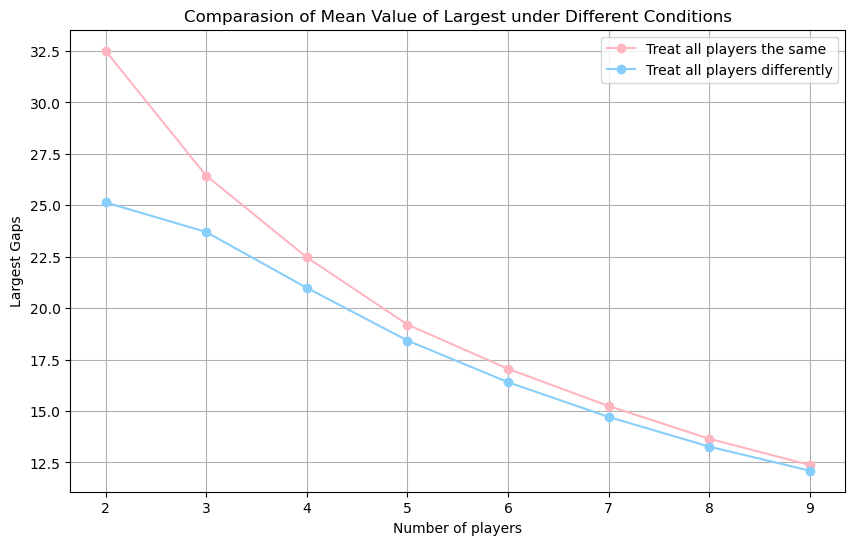

In [9]:
n_value = [2, 3, 4, 5, 6, 7, 8, 9]
plt.figure(figsize=(10, 6))

# Plot data points for all players as pink dots connected by lines
plt.plot(n_value, mean_q2, marker='o', linestyle='-', color='lightpink', label='Treat all players the same')

# Plot data points for different player as blue dots connected by lines
plt.plot(n_value, mean_real, marker='o', linestyle='-', color='lightskyblue', label='Treat all players differently')

# Customize the plot
plt.xlabel('Number of players')
plt.ylabel('Largest Gaps')
plt.title('Comparasion of Mean Value of Largest under Different Conditions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

##### Conclusion for Comparasion
So as the number of players (n) increase, the differences in mean values become smaller. The difference is largest when n is small. 

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

To make a game that has outcome follows binomial distribution, we can have 1 player grab card from [1,100]. Each round 
of the game the player will grab card 10 times and see how many of them have a number larger than 50.

In [10]:
# To make a game that has outcome follows binomial distribution, we can have 1 player grab card from [1,100]. Each round 
# of the game the player will grab card 10 times and see how many of them have a number larger than 50.

def play_game_with_sample(N, n, k, num_rounds):
    num_successes = 0  # Initialize the count of successes

    for _ in range(num_rounds):
        card_samples = sample_cards(N, n, k)  # Simulate card distribution among players
        round_successes = np.sum(card_samples >= 50)  # Count cards with numbers > 50
        num_successes += round_successes

    return num_successes

N = 100
n = 1
k = 1
num_rounds = 10

num_simulations = 10000
total_num_success = []
for i in range(num_simulations):
    success = play_game_with_sample(N, n, k, num_rounds)
    total_num_success.append(success)

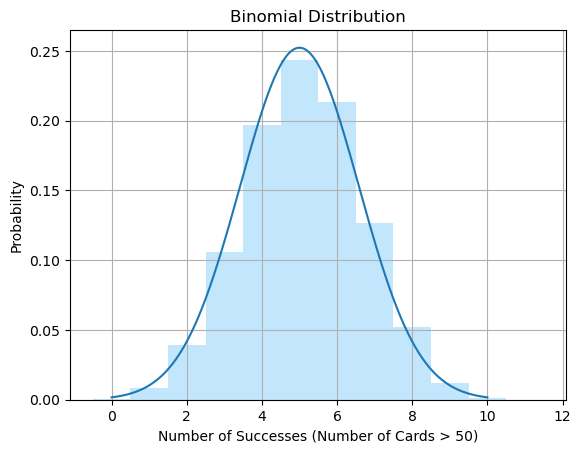

In [11]:
n = 10  # Number of trials (number of card draws per round)
p = 0.5  # Probability of success (probability of getting a card with a number > 50)
num_samples = 10000 
binomial_dist = binom(n, p)

# Generate a range of x-values for the curve
x = np.linspace(0, n, 1000)

# Calculate the PDF of the binomial distribution (approximated with a normal distribution)
mean = n * p
std_dev = np.sqrt(n * p * (1 - p))
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))


plt.plot(x, pdf, linestyle='-')
plt.hist(total_num_success, bins =  np.arange(-0.5, n + 2, 1), density=True, alpha=0.5, color='lightskyblue')
plt.xlabel('Number of Successes (Number of Cards > 50)')
plt.ylabel('Probability')
plt.title('Binomial Distribution')

# Show the plot
plt.grid(True)
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

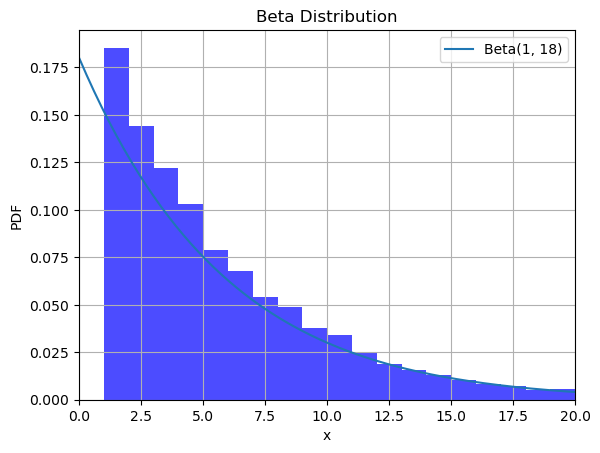

In [53]:
alpha = 1
beta_value = 18+1-1

# Generate values from the beta distribution
x = np.linspace(0, 1, 1000)
pdf = beta.pdf(x, alpha, beta_value)

# Plot the beta distribution
plt.hist(min_values_q1, bins=np.arange(1,40), density=True, alpha=0.7, color='b')
plt.plot(x*100, pdf/100, label=f'Beta({alpha}, {beta_value})')
plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.xlim(0,20)
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

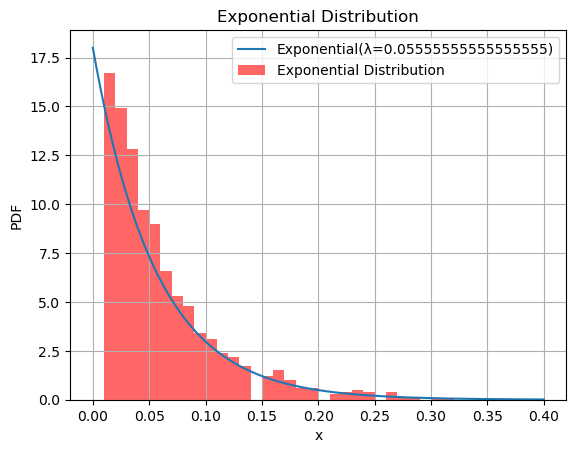

In [6]:
num_samples = 1000
N = 100
n = 6
k = 3

# Collect the lowested number
transformed_values = []
for i in range(num_samples):
    cards = sample_cards(N, n, k)
    min_value = np.min(cards)
    transformed_values.append(-np.log(1-(min_value/N)))
    
# Define parameter for exponential distribution
rate = 18
x = np.linspace(0, 0.4, 1000)
pdf = expon.pdf(x, scale=1/rate)
plt.plot(x, pdf, label=f'Exponential(λ={1/rate})')
plt.hist(transformed_values, bins = np.arange(0,0.4,0.01), density=True, alpha=0.6, color='red', label='Exponential Distribution')
plt.title('Exponential Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [5]:
def sample_cards_with_repalcement(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

In [16]:
# Initialize a list of values of N
Ns = np.arange(20,500,10)

# Initialize a dictionary to store the mean minimum values for different N
mean_without_replacement = []

for N in Ns:
    num_samples = 10000
    min_values_without_replacement = []

    for _ in range(num_samples):
        cards_with = sample_cards(N, 6, 3)
        min_values_without_replacement.append(np.min(cards_with))
    
    mean_without_replacement.append(np.mean(min_values_without_replacement)/N)

mean_with_replacement = []

for N in Ns:
    num_samples = 10000
    min_values_with_replacement = []

    for _ in range(num_samples):
        cards_without = sample_cards_with_repalcement(N, 6, 3)
        min_values_with_replacement.append(np.min(cards_without))
        
    mean_with_replacement.append(np.mean(min_values_with_replacement)/N)

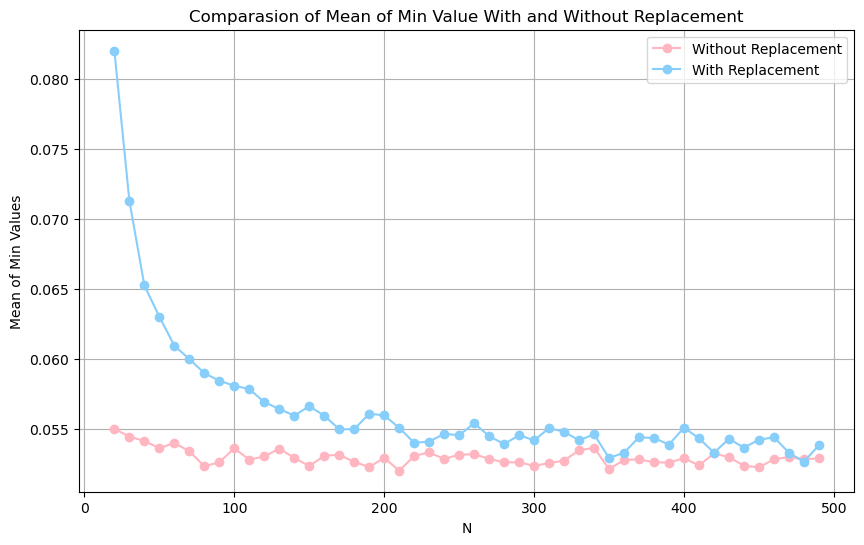

In [18]:
Ns = np.arange(20,500,10)
plt.figure(figsize=(10, 6))

# Plot data points for all players as pink dots connected by lines
plt.plot(Ns, mean_without_replacement, marker='o', linestyle='-', color='lightpink', label='Without Replacement')

# Plot data points for different player as blue dots connected by lines
plt.plot(Ns, mean_with_replacement, marker='o', linestyle='-', color='lightskyblue', label='With Replacement')

# Customize the plot
plt.xlabel('N')
plt.ylabel('Mean of Min Values')
plt.title('Comparasion of Mean of Min Value With and Without Replacement')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

When N is small, the gap between mean value of the minumum card under the two conditions (with replacement and without replacement) is larger. When N becomes larger, the gap between  mean value of the minumum card under the two conditions becomes smaller. But under the condition with repalcement, the mean value of the minimum card will alwasy be larger(they will become closer and closer to each other when N goes even larger).

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: